# Explore political and international situation changes from inaugural president address. 

I have always been interested in biographies and speeches of famous people. Different with other speech sets, the presidential inaugural address provides us a platform which is high enough to have a overall view of the changes of the United States. By analyzing this address set, we can understand thoroughly about past, now and future of America. My final project was mainly trying to figure out this problem. After reading few of the address of some presidents, I found their are lot of differences in style, length, readability, and spirit with different president. Some of these have regulars to follow, but some are not. I devoted into finding the regular of changes and analyze implicit connection between them with Python.(word frequency,word embedding，sentiment analysis） So, let me show you some codes. 

In [1]:
# all the libraries are put below. 
import spacy
import nltk
import json
import seaborn
import requests
import collections
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as sw
import pandas as pd
from pandas import DataFrame
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
nlp = spacy.load('en_core_web_lg')

# 1. A breif analysis of American political trends from word frequency

Initially, I want to analyze the most frequent words to find a theme for each president's speech. In order to make outcomes more readable, I used Stopwords to filter useless words. 

In [2]:
from nltk.corpus import inaugural

In [3]:
inauguralTexts = [inaugural.raw(fileid) for fileid in inaugural.fileids() ]

In [4]:
inauguralLabels =  [fileid[:-4] for fileid in inaugural.fileids()]

In [5]:
len(inauguralLabels)

58

In [6]:
inauguralDict = {}
for fileid in inaugural.fileids():
    inauguralDict[fileid] =inaugural.raw(fileid)

In [7]:
# find the most common words of each address
inauguralMostCommonWords = {}
for fileid in inaugural.fileids():
    text = inaugural.raw(fileid)
    w=[]
    for word in nlp(text):
        if word.text not in stopwords.words('english'):#filter the stopwords
            w.append(word.string.lower())
    inauguralMostCommonWords[fileid[:-4]] = Counter(w).most_common(15)
print(inauguralMostCommonWords)

{'1789-Washington': [(', ', 70), ('i ', 23), ('. ', 17), ('every ', 9), ('; ', 8), ('government ', 7), ('\n\n', 6), ('.', 6), ('public ', 6), ('may ', 6), ('present ', 5), ('citizens ', 4), ('one ', 4), ('ought ', 4), ('duty ', 4)], '1793-Washington': [('i ', 6), (', ', 5), ('shall ', 3), ('. ', 2), ('.', 2), ('oath ', 2), ('fellow ', 1), ('citizens', 1), ('called ', 1), ('upon ', 1), ('voice ', 1), ('country ', 1), ('execute ', 1), ('functions ', 1), ('chief ', 1)], '1797-Adams': [(', ', 201), ('. ', 20), ('; ', 18), ('.', 13), ('\n\n', 13), ('may ', 13), ('i ', 13), ('people ', 12), ('government ', 11), ('foreign ', 8), ('people', 8), ('country ', 7), ('constitution ', 7), ('ever ', 6), ('public ', 6)], '1801-Jefferson': [(', ', 128), ('. ', 31), ('; ', 23), ('i ', 21), ('may ', 8), ('us ', 8), ('let ', 7), ('government ', 7), ('\n\n', 6), ('shall ', 6), ('.', 6), ('would ', 6), ('one ', 6), ('fellow ', 5), ('citizens', 5)], '1805-Jefferson': [(', ', 142), ('. ', 27), ('; ', 26), ('i

Some of the presidential address can be analyzed by word frequency. We can find that from 1789 to about 1865, 'government', 'constitution', 'public', 'citizens', 'rights', 'improvements' are mentioned a lot. So, this period, 1789 to about 1865, I call it 'period of building America and improving the legal system'.  From about 1865 to 1941, 'war', 'world','freedom', 'peace','country'are  the most frequent words. So we can call it 'development of humanity in war'. And the word 'world', 'people' ,'America', 'together' were frequently referred to, so in this period, the United States became the center of the world.

However, this function is seems not so accurate to help us extract the theme of every address. After read some original texts, I found it because each presidential address was extremely implicit. For instance, in '1789-Washington' the word 'Almighty Being' only showed once but in the following pages, the word 'Almighty Being' was frequently replaced by 'he'. Unfortunately, this function can't realize that. So I decided to use some specific words to see the changes of each president, and help me to anticipate the international situation. 

In [34]:
inauguralFreqSeries = [pd.Series(Counter([word.string.strip().lower() for word in nlp(text)]))/len(nlp(text)) for text in inauguralTexts]
inauguralFreqseriesDict = {label: series for label, series in zip(inauguralLabels, inauguralFreqSeries)}
inauguralFreqDf = pd.DataFrame(inauguralFreqseriesDict).T.fillna(0)
trend = inauguralFreqDf[['america','world','people']]
religion = inauguralFreqDf[['god','almighty','freedom', 'justice']]

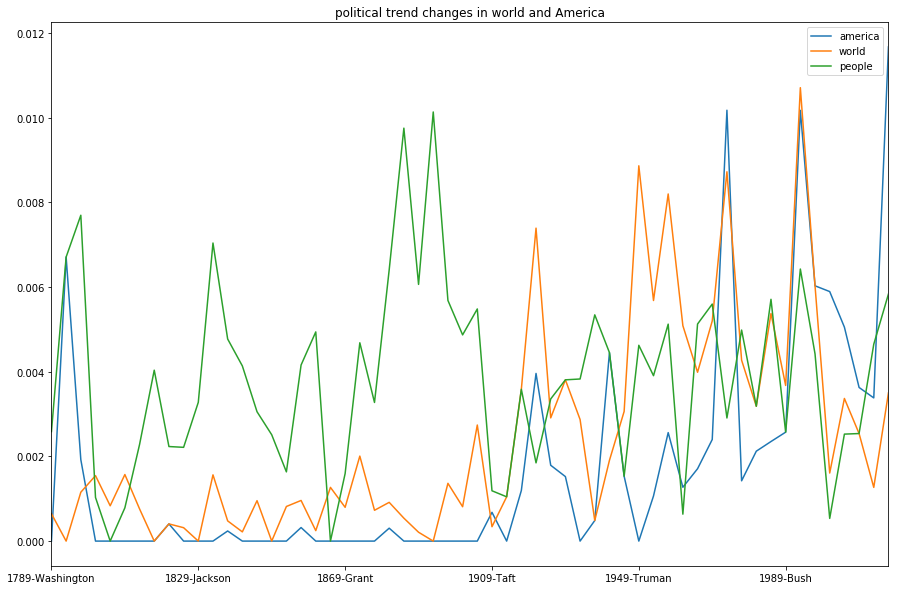

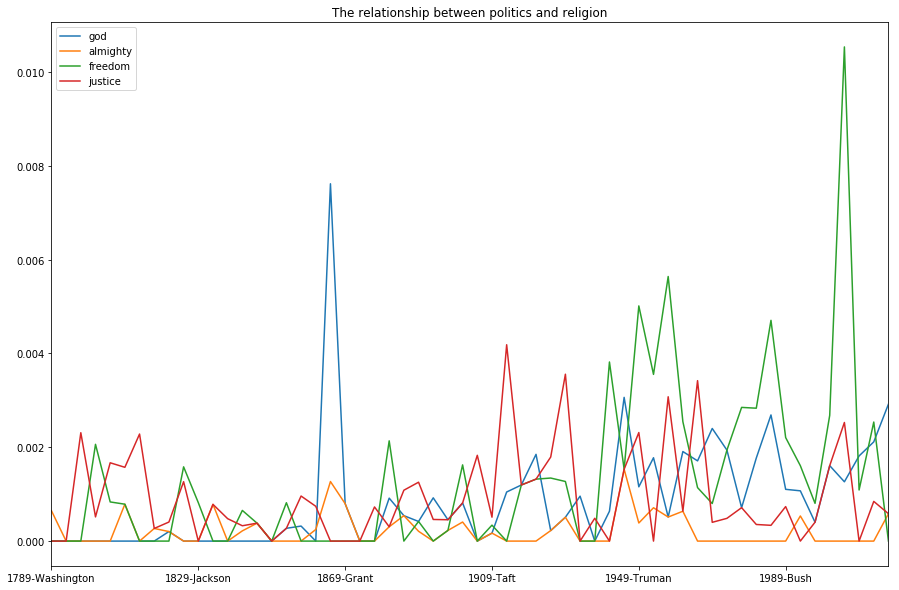

In [37]:
trend.plot(kind='line',figsize=(15,10),title = 'political trend changes in world and America')
religion.plot(kind='line',figsize=(15,10),title = 'The relationship between politics and religion' )

It's not hard to find that the word 'people' was always the main melody of very president. Clearly, the people-centered is the eternal theme of the United States. Besides, it was particularly popular in the late 1800s. I think that beacause that period was the civil war of America. The government was cared about people and freedom that a series of revolitionary measures was carried out, such as liberating slaves and introducing The homestead law. The right and freedom of people were highlighted. Besides, it's worth noting that, from 1909, 'America', 'world' were dramatically increased. That's when America became the center of the world. After World War I, the America economy was growing extremely fast. The growing of frequency of word 'world' show the confidence of leading the world. What's more, it's very interesting that the frequency of 'world' fell after 21st century. In the contrast, 'America' became extremely high . Especially when came to Trump, it reached a peak. I also partly reflects a shift to 'America First' policy and some subtle changes in international situation.  

And also from close reading, I found that almost all inaugural addresses had refereed to religionary words, especially before 19th century. So, I came up with a hypothesis: although the church and congress are completely split in the United States, the religion also had indelible influence in America political ideas. The government and religion were always intergrated tightly. Besides a majority of the address refer to a deity in some form. (e.g, God, the Hand which guides the Universe, Jesus.) I assumed that some religious rederences can be used as indicators, especially if their contexts are used to lesitimize political statements. From the frequency of 'god' and 'almighty' we can see that the religion does exist in the inaugural addresses of the presidents. I used the freuqency of political words like 'freedom', 'justice' to see how religious faith impacted political spirit. The more equal proportion of political words and religious words, the more impact that the religion has. It seems that before 20th century, religion played more important role in controlling people’s ideology. After that, the enthusiasm of pursue ‘freedom’ and ‘justice’ became relatively high. In conclusion, the religion believe does has influence on politics, and after 20th century, the ideology of freedom and justice gradually weaken the impacts of them. 

# 2.A brief analysis of character of each president from the perspective of word embedding and sentiment analysis.

In [11]:
def similarity(vecA, vecB):
    return dot(vecA, vecB) / (norm(vecA, ord=2) * norm(vecB, ord=2))

In [38]:
PresSimilarities = [[nlp(Text).similarity(nlp(text)) for text in inauguralTexts] for Text in inauguralTexts ]

In [39]:
PresSimilaritiesDF = pd.DataFrame(PresSimilarities, columns=inauguralLabels, index=inauguralLabels)

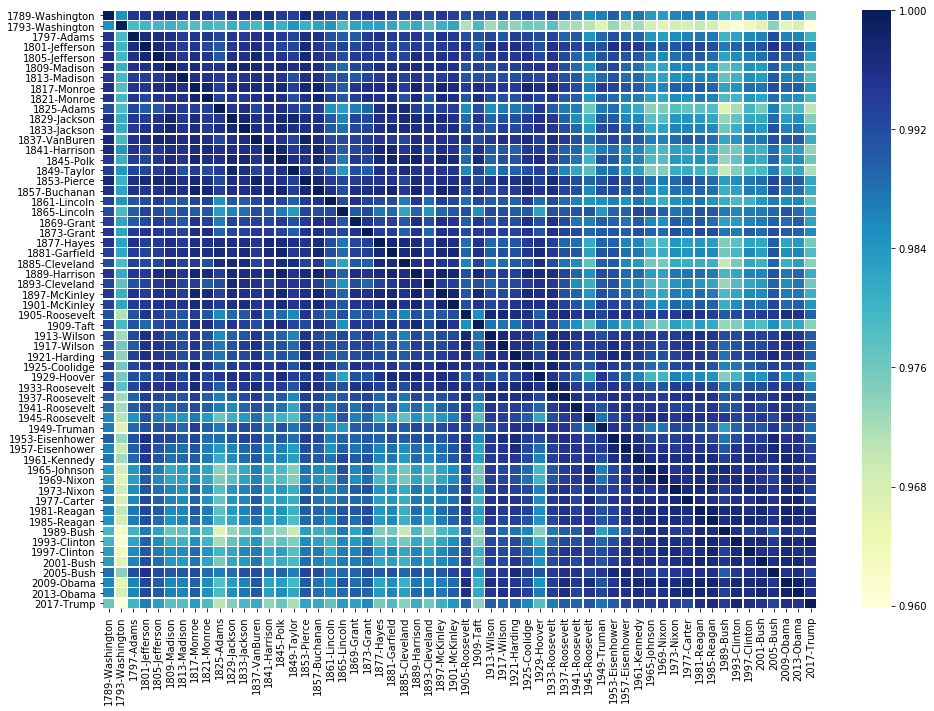

In [40]:
fig, ax = plt.subplots(figsize=(16,11))
seaborn.heatmap(PresSimilaritiesDF,linewidths=.5,cmap= 'YlGnBu',)

We can find from above plot that the style of different president was regular changed by the time. The lighter the color is the more different it with others. The top area is dark, generally the early presidents‘ styles are similar. From 1941-Roosevelt, it changed. Roosevelt is a outstanding president in America history. In 1941 inaugural address, he issued the New Deal，saved the economy. These  measures and revolution had deeply influenced American government circles. Besides，the length of their addresses are seems not so consistent, 1793-Washington address was really different from others because it only had about 150 words. 

This plot seems not critical enough, so I decided to make a sentiment score comparison. 

In [41]:
inauguralDocs = {}
for fileid in inaugural.fileids():
    inauguralDocs[fileid[:-4]] = nlp(inaugural.raw(fileid))

In [46]:
def textSentimentMean (text):
#make a list to contain all the sentences 
    lemmaList = []
    for sent in text.sents: 
        sentLemmaList = []
        for w in sent: 
            if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                sentLemmaList.append((w.lemma_, w.pos_))
        lemmaList.append(sentLemmaList)

# calculate the emotional score for each sentence
    sentScores = []
    for sent in lemmaList: 
        scores = []
        for word, pos in sent: 
            synPos = pos.lower()[0]
            if synPos not in ['a', 'n', 'v']:
                continue
            synsets = list(sw.senti_synsets(word, synPos))
            #print(synsets)
            if (type(synsets) == list) and len(synsets)>0:
                #print('yay!')
                synset = synsets[0]
                score = synset.pos_score() - synset.neg_score()
                scores.append(score)
        if len(scores)>0: 
            avgScores = sum(scores)/len(scores)
            sentScores.append(avgScores)
        
# Calculate the average score for the whole text
    sentSentimentMean = pd.Series(sentScores).rolling(10).mean().fillna(0)
    sumScore = 0
    for value in sentSentimentMean:
        sumScore += value
        aver = sumScore / len(sentSentimentMean)
    return(aver)


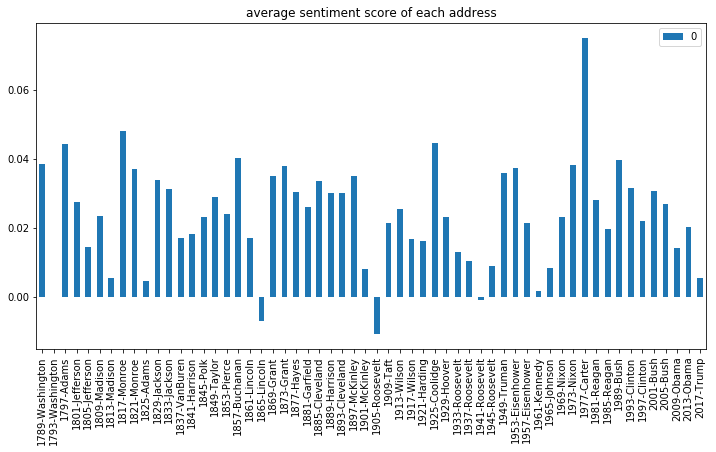

In [70]:
outMean = []
for label in inauguralLabels :
    outMean.append (textSentimentMean(inauguralDocs[label]))
    
outDF = pd.DataFrame(outMean,index = inauguralLabels)
outDF.plot(kind = 'bar', figsize=(12,6),title = 'average sentiment score of each address')

The presidents, whose sentiment score was relatively low, are ‘1813-Madison’ , ‘1825-Adams’, ‘1865-Lincoln’, 1901-McKinley’, ‘1905-Roosevelt’, ‘four periods of Roosevelt’, ‘1965-Johnson’ and ‘2017-Trump’ .These inaugural addresses help us to learn what kind of suffering that America had gone through. From close reading, we can find, in 1812, the United States launched a war against the United Kingdom and opposed the British attack on the United States in the economic, military, and sovereign spheres. In 1865 the United States was suffering the Civil War. Slavery system and war are destroying people of all colors in the United States, and the war which was really brutal and lasted four years had kept the people in dire straits. Lincoln's inaugural address throughout the article is expressing eager anticipation of the early end of the war. And also we can see that 1933-1945 Roosevelt When he was in office The United States was suffering from the worst economic crisis in history, the currency was seriously depreciated, the tax revenue increased while the fiscal revenue was still in serious shortage, and a large number of people were unemployed. The great Roosevelt issued the New Deal, which contains a series of programs, public work projects, financial reforms to recover from the Great Depression. Roosevelt facing with the Great Depression with great confidence and high enthusiasm to come over this catastrophe. 

However, somewhere that not works so well is that 1905 Roosevelt sentimental score was lowest. After read this address, I found it actually conveys optimistic opinions. That’s because this function only take adjectives into consideration. 1905 Roosevelt has little adjectives but it sentences expressed active attitudes and emotions. However, 1977-Carter got the highest score, it has many words like ‘harmonious’，‘great’, and ‘splendid’. I think Carter was the most optimistic president in America, at least in his speech.  

# Summmmary & conclusion

All in all，
The president’s speech is more representative of the position of the government and the country in the next four years. Therefore, from their speeches, we can understand and discover the context of the development of American history and the hot topics of concern to the American people under historical conditions. The characteristics of American culture. Washington, the father of the United States, felt the power of God blessings and the people’s inner desires and voices, and was crowned the first presidential throne. Jefferson faced the turmoil of the world situation and drafted the historic Declaration of Independence. In the face of the financial crisis, Obama It is powerfully declared that God will give us the knowledge to cope with and solve the unknown destiny. Each president's speech was so illustrious which has made a history of American struggling and developing

Second, the length of the speech was varies, and President Washington only said about 150 words in his second speech, and Harrison’s inaugural speech set the longest history, reading nearly two hours in a blizzard. However, whether it is long or short, we will feel the shock and passion from their language. Through the text, we can discover the hidden spiritual power. We help ourselves analyze and extract the literary mysteries through python. In 1933, in the face of an unprecedented economic depression, Franklin Roosevelt profoundly pointed out at the first inauguration ceremony: "The only thing we need to fear is fear itself." These wonderful speeches evoke powerful spiritual power, which shocks us. It also allows us to realize and enlighten from it, and this is also our precious treasure.

Democracy and freedom are the basic beliefs of every president and citizen of the United States. From the Declaration of Independence to the liberation of slaves, from Roosevelt to Bush, the speeches of each head of state have rooted the free will in the minds and blood of the American people.

Believing in religion is another important feature of American culture. This feature was also vividly reflected in the presidential inauguration speech. Their speeches also cover the content of religion, and many religious principles have become the norms of the president of the United States. The American concept of freedom and democracy also comes from religious traditions and is closely integrated with religion. This makes the president's inaugural speech show a higher level of connotation.
Each president's personality traits and sentiment index are also different, mostly positive and inspiring people, but in some important historical nodes such as war, economic crisis, emotional scores will be different.

The above is my superficial analysis of the inauguration addressed of  US presidents. Due to many cultural factors, my views on many places are still not in place. Please forgive me about that Besides, I have published my codes at my github, there is a link.
https://github.com/Chaofan135/inaugural-address-text-analysis/blob/master/final%202.ipynb
